
7 Days of Codes

Desafio: Dia 7

Vitor Kawasaki

#Importando Biblioteca

In [1]:
import pandas as pd


#Carregando Dataset

In [2]:
df = pd.read_csv('desafio_dia2.csv', sep=';', encoding='ISO-8859-1')

#Verificação de Colunas

In [3]:
df.columns

Index(['id_emprestimo', 'codigo_barras', 'data_renovacao', 'horario_renovacao',
       'data_emprestimo', 'horario_emprestimo', 'data_devolucao',
       'horario_devolucao', 'matricula_ou_siape', 'tipo_vinculo_usuario',
       'id_exemplar', 'colecao', 'biblioteca', 'status_material',
       'localizacao', 'ano_emprestimo', 'tema'],
      dtype='object')

In [4]:
df.sample(5)

,id_emprestimo,codigo_barras,data_renovacao,horario_renovacao,data_emprestimo,horario_emprestimo,data_devolucao,horario_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,ano_emprestimo,tema
4920,2967754,2014034145,1970-01-01,00:00,2020-02-12,11:19,2021-08-04,11:05,2387280,DOCENTE,1125490,Acervo Circulante,BIBLIOTECA SETORIAL DO NÃÂºCLEO DE EDUCAÃÂ§Ã...,REGULAR,314,2020,Ciencias sociais
61457,2793406,2009052841,2019-02-27,18:53,2019-02-12,17:27,2019-02-28,12:03,20160129000,ALUNO_GRADUACAO,285479,Acervo Circulante,BIBLIOTECA SETORIAL DO CENTRO CIÃÂªNCIAS DA S...,REGULAR,648,2019,Ciencias aplicadas
124712,9998660,L156248,1970-01-01,00:00,2017-08-16,11:31,2017-09-15,16:37,20151029356,ALUNO_POS_GRADUACAO,52733,Acervo Circulante,BIBLIOTECA CENTRAL ZILA MAMEDE,REGULAR,699,2017,Ciencias aplicadas
19650,2985362,L138272,1970-01-01,00:00,2020-03-11,16:58,2021-11-11,08:49,1952108,SERVIDOR_TECNICO_ADM,59872,Acervo Circulante,BIBLIOTECA CENTRAL ZILA MAMEDE,REGULAR,647,2020,Ciencias aplicadas
62649,2797908,2014030274,2019-03-06,22:22,2019-02-15,09:10,2019-03-12,12:49,20180023617,ALUNO_GRADUACAO,1139986,Acervo Circulante,BIBLIOTECA CENTRAL ZILA MAMEDE,REGULAR,655,2019,Ciencias aplicadas


In [5]:
# Converter as colunas de data para o tipo datetime
df['data_emprestimo'] = pd.to_datetime(df['data_emprestimo'])

# Filtrar os dados para os dois períodos desejados: 2017-2018 e 2018-2019
periodo_2017_2018 = df[(df['data_emprestimo'].dt.year >= 2017) & (df['data_emprestimo'].dt.year <= 2018)]
periodo_2018_2019 = df[(df['data_emprestimo'].dt.year >= 2018) & (df['data_emprestimo'].dt.year <= 2019)]

# Contar a quantidade de empréstimos por tema em cada período
emprestimos_2017_2018 = periodo_2017_2018['tema'].value_counts()
emprestimos_2018_2019 = periodo_2018_2019['tema'].value_counts()

# Exibir os resultados
print("Quantidade de empréstimos por tema em 2017-2018:")
print(emprestimos_2017_2018)
print("\nQuantidade de empréstimos por tema em 2018-2019:")
print(emprestimos_2018_2019)

Quantidade de empréstimos por tema em 2017-2018:
tema
Ciencias aplicadas                       36755
Ciencias sociais                         12329
Matematica e ciencias naturais            5135
Religiao                                  3002
Generalidades. Ciencia e conhecimento     2943
Filosofia e psicologia                    2880
Geografia, Biografia, Historia             405
Belas artes                                401
Linguagem, Lingua, Linguistica             399
Name: count, dtype: int64

Quantidade de empréstimos por tema em 2018-2019:
tema
Ciencias aplicadas                       52531
Ciencias sociais                         18492
Matematica e ciencias naturais            8465
Religiao                                  4567
Generalidades. Ciencia e conhecimento     4547
Filosofia e psicologia                    4512
Geografia, Biografia, Historia            1663
Belas artes                               1617
Linguagem, Lingua, Linguistica            1598
Name: count, dtype:

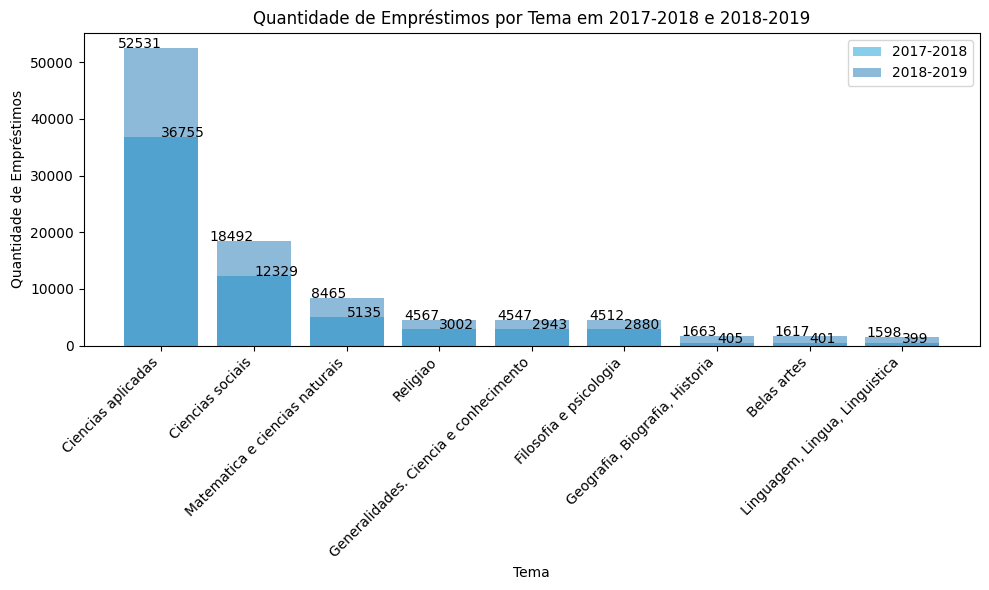

In [20]:
import matplotlib.pyplot as plt

# Preparar os dados para o gráfico de barras
temas_2017_2018 = emprestimos_2017_2018.index
emprestimos_2017_2018_values = emprestimos_2017_2018.values
emprestimos_2018_2019_values = emprestimos_2018_2019.values

# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))

plt.bar(temas_2017_2018, emprestimos_2017_2018_values, label='2017-2018', color='skyblue')
plt.bar(temas_2017_2018, emprestimos_2018_2019_values, label='2018-2019', alpha=0.5)

plt.xlabel('Tema')
plt.ylabel('Quantidade de Empréstimos')
plt.title('Quantidade de Empréstimos por Tema em 2017-2018 e 2018-2019')
plt.xticks(rotation=45, ha='right')
plt.legend()

# Adicionar a numeração de cada barra
for i in range(len(temas_2017_2018)):
    plt.text(i, emprestimos_2017_2018_values[i] + 0.1, str(emprestimos_2017_2018_values[i]), ha='left')
    plt.text(i, emprestimos_2018_2019_values[i] + 0.1, str(emprestimos_2018_2019_values[i]), ha='right')

plt.tight_layout()

plt.show()


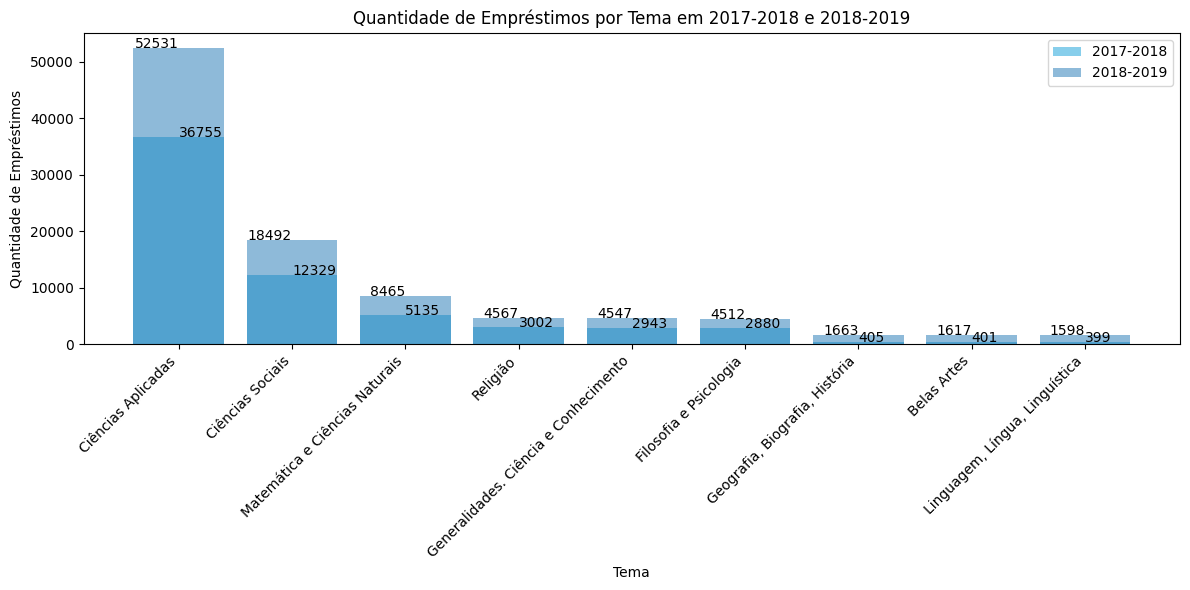

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Temas
temas = ['Ciências Aplicadas', 'Ciências Sociais', 'Matemática e Ciências Naturais',
         'Religião', 'Generalidades. Ciência e Conhecimento', 'Filosofia e Psicologia',
         'Geografia, Biografia, História', 'Belas Artes', 'Linguagem, Língua, Linguística']

# Quantidade de empréstimos por tema em 2017-2018
emprestimos_2017_2018_values = np.array([36755, 12329, 5135, 3002, 2943, 2880, 405, 401, 399])

# Quantidade de empréstimos por tema em 2018-2019
emprestimos_2018_2019_values = np.array([52531, 18492, 8465, 4567, 4547, 4512, 1663, 1617, 1598])

# Plotar o gráfico de barras
plt.figure(figsize=(12, 6))

plt.bar(temas, emprestimos_2017_2018_values, label='2017-2018', color='skyblue')
plt.bar(temas, emprestimos_2018_2019_values, label='2018-2019', alpha=0.5)

plt.xlabel('Tema')
plt.ylabel('Quantidade de Empréstimos')
plt.title('Quantidade de Empréstimos por Tema em 2017-2018 e 2018-2019')
plt.xticks(rotation=45, ha='right')
plt.legend()

# Adicionar a numeração de cada barra
for i in range(len(temas)):
    plt.text(i, emprestimos_2017_2018_values[i] + 0.1, str(emprestimos_2017_2018_values[i]), ha='left')
    plt.text(i, emprestimos_2018_2019_values[i] + 0.1, str(emprestimos_2018_2019_values[i]), ha='right')

plt.tight_layout()

# Salvar o gráfico como uma imagem PNG
plt.savefig('grafico.png')

# Criar o HTML para incorporar a imagem
html_code = """
<!DOCTYPE html>
<html>
<head>
<title>Gráfico de Barras</title>
<style>
table {
  width: 100%;
  border-collapse: collapse;
}

th {
  font-size: 1.4rem;
  text-align: center;
  font-weight: bold;
  color: whitesmoke;
  background-color: #001692;
  border-radius: 0.25rem;
  box-shadow: 0 0 1rem gray;
}

td {
  font-size: 1rem;
  padding: 0.5rem;
  text-align: left;
  font-weight: bold;
  border-bottom: 0.1rem solid lightgray;
}
</style>
</head>
<body>

<h2 style="text-align:center;">Gráfico de Barras</h2>
<p style="text-align:center;">Aqui está o gráfico de barras gerado:</p>

<img src="grafico.png" alt="Gráfico de Barras">

</body>
</html>
"""

# Salvar o HTML em um arquivo
with open('grafico.html', 'w') as f:
    f.write(html_code)
